<a href="https://colab.research.google.com/github/Cbaird26/ComprehensivePhysicsSolver/blob/main/THEORY_OF_EVERYTHING_CHRISTOPHER_MICHAEL_BAIRD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

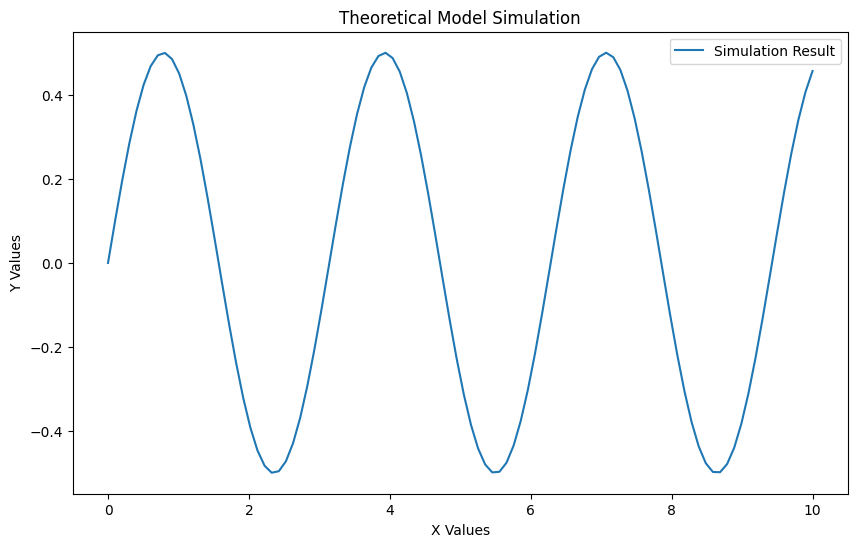

OmniHealthMonitor Linear Prediction for input 3: [6.]
OmniHealthMonitor RF Prediction for input 3: [3.24]
Epoch 1/100
4/4 [==============================] - 6s 11ms/step - loss: 3.2749 - mae: 1.6254
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 2.9735 - mae: 1.5429
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 2.6799 - mae: 1.4591
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 2.4137 - mae: 1.3788
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 2.1579 - mae: 1.3004
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 1.9145 - mae: 1.2210
Epoch 7/100
4/4 [==============================] - 0s 19ms/step - loss: 1.6891 - mae: 1.1412
Epoch 8/100
4/4 [==============================] - 0s 18ms/step - loss: 1.4747 - mae: 1.0561
Epoch 9/100
4/4 [==============================] - 0s 20ms/step - loss: 1.2452 - mae: 0.9647
Epoch 10/100
4/4 [==============================] - 0s 11m

ConnectionError: HTTPSConnectionPool(host='example-cloud-service.com', port=443): Max retries exceeded with url: /upload (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7c5a9bf621d0>: Failed to resolve 'example-cloud-service.com' ([Errno -2] Name or service not known)"))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import requests
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras import layers
import dask.array as da

# Fundamental Constants
GRAVITATIONAL_CONSTANT = 6.67430e-11
SPEED_OF_LIGHT = 299792458
PLANCK_CONSTANT = 6.62607015e-34
BOLTZMANN_CONSTANT = 1.380649e-23

# Universal Equations
def newtons_law_of_gravity(m1, m2, r):
    return GRAVITATIONAL_CONSTANT * m1 * m2 / r**2

def schrodinger_equation(psi, t, hbar=PLANCK_CONSTANT):
    return -1j * hbar * np.gradient(psi, t)

def einstein_field_equations(G, T):
    return G * T / (8 * np.pi * GRAVITATIONAL_CONSTANT)

def maxwell_equations(E, B, rho, J):
    dE_dt = np.gradient(E) - rho
    dB_dt = np.gradient(B) - J
    return dE_dt, dB_dt

def theoretical_model(x):
    return np.sin(x) * np.cos(x)

def reaction_rate(A, E_a, T):
    return A * np.exp(-E_a / (BOLTZMANN_CONSTANT * T))

def run_simulation(model, x_values):
    x_values_dask = da.from_array(x_values, chunks=(1000,))
    results = model(x_values_dask)
    return results.compute()

def plot_simulation(x_values, y_values, title):
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label='Simulation Result')
    plt.title(title)
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.legend()
    plt.show()

def upload_to_cloud(data, filename, cloud_url):
    response = requests.post(cloud_url, files={filename: json.dumps(data)})
    return response.status_code

def save_documentation(data, filename):
    with open(filename, 'w') as file:
        json.dump(data, file)

class OmniHealthMonitor:
    def __init__(self):
        self.data = []
        self.linear_model = LinearRegression()
        self.rf_model = RandomForestRegressor(n_estimators=100)

    def add_data(self, new_data):
        self.data.append(new_data)

    def train_models(self):
        X = np.array([d['input'] for d in self.data]).reshape(-1, 1)
        y = np.array([d['output'] for d in self.data])
        self.linear_model.fit(X, y)
        self.rf_model.fit(X, y)

    def predict(self, new_input):
        linear_prediction = self.linear_model.predict(np.array(new_input).reshape(-1, 1))
        rf_prediction = self.rf_model.predict(np.array(new_input).reshape(-1, 1))
        return linear_prediction, rf_prediction

def create_neural_network(input_shape):
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def train_neural_network(model, X_train, y_train, epochs=100):
    model.fit(X_train, y_train, epochs=epochs)
    return model

def predict_with_neural_network(model, X_test):
    return model.predict(X_test)

def main():
    # Run and plot theoretical model simulation
    x_values = np.linspace(0, 10, 100)
    y_values = run_simulation(theoretical_model, x_values)
    plot_simulation(x_values, y_values, "Theoretical Model Simulation")

    # OmniHealthMonitor usage
    health_monitor = OmniHealthMonitor()
    health_monitor.add_data({'input': 1, 'output': 2})
    health_monitor.add_data({'input': 2, 'output': 4})
    health_monitor.train_models()
    prediction_linear, prediction_rf = health_monitor.predict([3])
    print(f"OmniHealthMonitor Linear Prediction for input 3: {prediction_linear}")
    print(f"OmniHealthMonitor RF Prediction for input 3: {prediction_rf}")

    # Neural Network usage
    X_train = np.random.rand(100, 1)
    y_train = 3 * X_train[:, 0] + np.random.randn(100) * 0.1
    nn_model = create_neural_network(input_shape=1)
    trained_model = train_neural_network(nn_model, X_train, y_train)
    predictions = predict_with_neural_network(trained_model, X_train)
    print(f"Neural Network Predictions: {predictions[:5]}")

    # Save and upload documentation
    documentation = {
        'theory': "Theory of Everything Model",
        'simulation_results': y_values.tolist(),
        'health_monitor': health_monitor.data
    }
    save_documentation(documentation, 'documentation.json')
    cloud_url = "https://example-cloud-service.com/upload"
    upload_status = upload_to_cloud(documentation, 'documentation.json', cloud_url)
    print(f"Documentation upload status: {upload_status}")

if __name__ == "__main__":
    main()
